In [1]:
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from empirical_mdn import * 

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *
def scaling_exp(noise_level=1, seed=1, nrow=1000):
    np.random.seed(seed)

    # Generate random coordinates
    x = np.random.rand(nrow)
    y = np.random.rand(nrow)
    X = np.column_stack((x, y))  # This will be your 'df'

    # Generate f matrix (3 x 200)
    f = np.empty((3, 200))
    for i in range(200):
        t1 = np.random.choice([0, 1])
        t2 = np.random.choice([0, 1])
        f[0, i] = t1 * np.random.randn()
        f[1, i] = t2 * np.random.randn()
        f[2, i] = t2 * np.random.randn()

    # Initialize L matrix
    L = np.empty((nrow, 3))

    for i in range(nrow):
        if (x[i] < 0.33 and y[i] < 0.33) or \
           (0.33 < x[i] < 0.66 and 0.33 < y[i] < 0.66) or \
           (x[i] > 0.66 and y[i] > 0.66):
            L[i, :] = [1, 0, 0]
        elif (x[i] < 0.33 and y[i] > 0.66) or \
             (0.33 < x[i] < 0.66 and y[i] < 0.33) or \
             (x[i] > 0.66 and 0.33 < y[i] < 0.66):
            L[i, :] = [0, 1, 0]
        else:
            L[i, :] = [0, 0, 1]

    # Generate noisy observations
    Z = L @ f + np.random.normal(scale=noise_level, size=(nrow, f.shape[1]))

    return Z, X  # X is a (nrow x 2) NumPy array with x and y


In [2]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\ebnm1000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [3]:
timings = []


In [4]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=1000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z, 
               X_l= coords,
               K=3)
  
    mycebmf.init_LF()
    mycebmf.iter(  )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(1000, 200)
(1000, 2)
Run 1 took 0.7237 seconds
(1000, 200)
(1000, 2)
Run 2 took 0.6783 seconds
(1000, 200)
(1000, 2)
Run 3 took 0.8037 seconds
(1000, 200)
(1000, 2)
Run 4 took 0.7485 seconds
(1000, 200)
(1000, 2)
Run 5 took 0.7118 seconds
(1000, 200)
(1000, 2)
Run 6 took 0.7509 seconds
(1000, 200)
(1000, 2)
Run 7 took 0.7334 seconds
(1000, 200)
(1000, 2)
Run 8 took 0.8386 seconds
(1000, 200)
(1000, 2)
Run 9 took 0.8372 seconds
(1000, 200)
(1000, 2)
Run 10 took 0.7612 seconds


In [5]:
mycebmf.iter()

(1000, 200)
(1000, 2)
Epoch 10/50, Loss: 1.1396
Epoch 20/50, Loss: 1.0627
Epoch 30/50, Loss: 0.9949
Epoch 40/50, Loss: 0.7882
Epoch 50/50, Loss: 0.5626
Epoch 10/50, Loss: 1.1160
Epoch 20/50, Loss: 1.0352
Epoch 30/50, Loss: 0.8755
Epoch 40/50, Loss: 0.6425
Epoch 50/50, Loss: 0.5435
Epoch 10/50, Loss: 0.9560
Epoch 20/50, Loss: 0.6438
Epoch 30/50, Loss: 0.2925
Epoch 40/50, Loss: 0.0075
Epoch 50/50, Loss: -0.0522
Epoch 10/50, Loss: 0.0008
Epoch 20/50, Loss: -0.1606
Epoch 30/50, Loss: -0.2626
Epoch 40/50, Loss: -0.3376
Epoch 50/50, Loss: -0.4007
Epoch 10/50, Loss: 0.4902
Epoch 20/50, Loss: 0.4001
Epoch 30/50, Loss: 0.3523
Epoch 40/50, Loss: 0.3076
Epoch 50/50, Loss: 0.2652
Epoch 10/50, Loss: -0.4339
Epoch 20/50, Loss: -0.6354
Epoch 30/50, Loss: -0.7379
Epoch 40/50, Loss: -0.7654
Epoch 50/50, Loss: -0.7850
Epoch 10/50, Loss: -0.3064
Epoch 20/50, Loss: -0.3596
Epoch 30/50, Loss: -0.4463
Epoch 40/50, Loss: -0.5030
Epoch 50/50, Loss: -0.5324
Epoch 10/50, Loss: 0.3223
Epoch 20/50, Loss: 0.2306
E

In [6]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\ebnm10000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [7]:
timings = []

In [8]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=10000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z, 
               X_l= coords,
               K=3)
    mycebmf.init_LF()  
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(10000, 200)
(10000, 2)
Run 1 took 5.2584 seconds
(10000, 200)
(10000, 2)
Run 2 took 5.6773 seconds
(10000, 200)
(10000, 2)
Run 3 took 4.8756 seconds
(10000, 200)
(10000, 2)
Run 4 took 4.9526 seconds
(10000, 200)
(10000, 2)
Run 5 took 5.4241 seconds
(10000, 200)
(10000, 2)
Run 6 took 5.5221 seconds
(10000, 200)
(10000, 2)
Run 7 took 6.5067 seconds
(10000, 200)
(10000, 2)
Run 8 took 6.4531 seconds
(10000, 200)
(10000, 2)
Run 9 took 6.5888 seconds
(10000, 200)
(10000, 2)
Run 10 took 6.8542 seconds


In [10]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\ebnm100000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [11]:

timings = []

In [12]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=100000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z, 
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(100000, 200)
(100000, 2)
Run 1 took 46.6738 seconds
(100000, 200)
(100000, 2)
Run 2 took 50.1820 seconds
(100000, 200)
(100000, 2)
Run 3 took 46.0035 seconds
(100000, 200)
(100000, 2)


KeyboardInterrupt: 

In [ ]:
timings

[28.791855335235596,
 29.381715059280396,
 30.80433750152588,
 35.34103035926819,
 27.156911611557007,
 27.219160318374634,
 27.291404962539673,
 32.00486969947815,
 29.336264610290527,
 28.70994472503662]

In [ ]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\ebnm1000000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [27]:
timings = []

In [ ]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=1000000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z, 
               X_l= coords,
               K=3)
    mycebmf.init_LF() 
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(1000000, 200)
(1000000, 2)


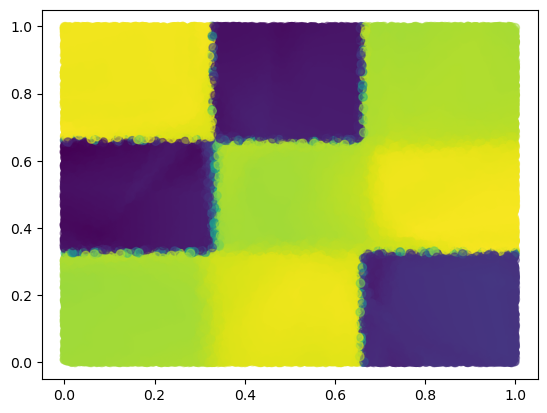

In [20]:
plt.scatter(coords[:,0], coords[:,1], alpha=0.5,
            c= mycebmf.L [:,2] )
 

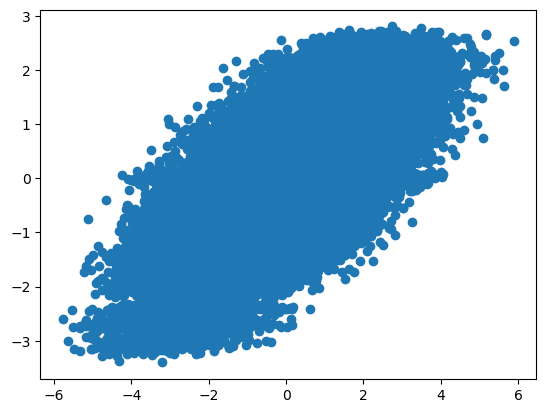

In [ ]:
plt.scatter (Z, mycebmf.L@ mycebmf.F.T) 